In [5]:
import sys
import os
import urllib.request  
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Gromacs_py import
sys.path.insert(0, os.path.abspath('../../..'))
import gromacs_py
import gromacs_py.gromacs.gmx5 as gmx

import gromacs_py.gromacs.tools.os_command as os_command

In [6]:
%cd /Users/smurail/Documents/Code/gromacs_py/gromacs_py/doc/notebook/
%matplotlib notebook
#%matplotlib nbagg
#%matplotlib inline


/Users/smurail/Documents/Code/gromacs_py/gromacs_py/doc/notebook


In [10]:
md_sys = gmx.GmxSys(name='1Y0M', coor_file='data_sim/sys_equi/sys_equi/01_equi_CA/equi_CA_1Y0M.gro')
md_sys.top_file = 'data_sim/sys_top/1Y0M_water_ion.top'

md_sys.display()


name         : 1Y0M
coor_file    : data_sim/sys_equi/sys_equi/01_equi_CA/equi_CA_1Y0M.gro
top_file     : data_sim/sys_top/1Y0M_water_ion.top
nt           : 0
ntmpi        : 0
sys_history  : 0


-Create the tpr file  1Y0M.tpr
gmx grompp -f 1Y0M.mdp -c ../data_sim/sys_equi/sys_equi/01_equi_CA/equi_CA_1Y0M.gro -r ../data_sim/sys_equi/sys_equi/01_equi_CA/equi_CA_1Y0M.gro -p ../data_sim/sys_top/1Y0M_water_ion.top -po out_1Y0M.mdp -o 1Y0M.tpr -maxwarn 1
-Launch the simulation 1Y0M.tpr
gmx mdrun -s 1Y0M.tpr -deffnm 1Y0M -nt 0 -ntmpi 0 -nsteps -2 -nocopyright


<IPython.core.display.Javascript object>


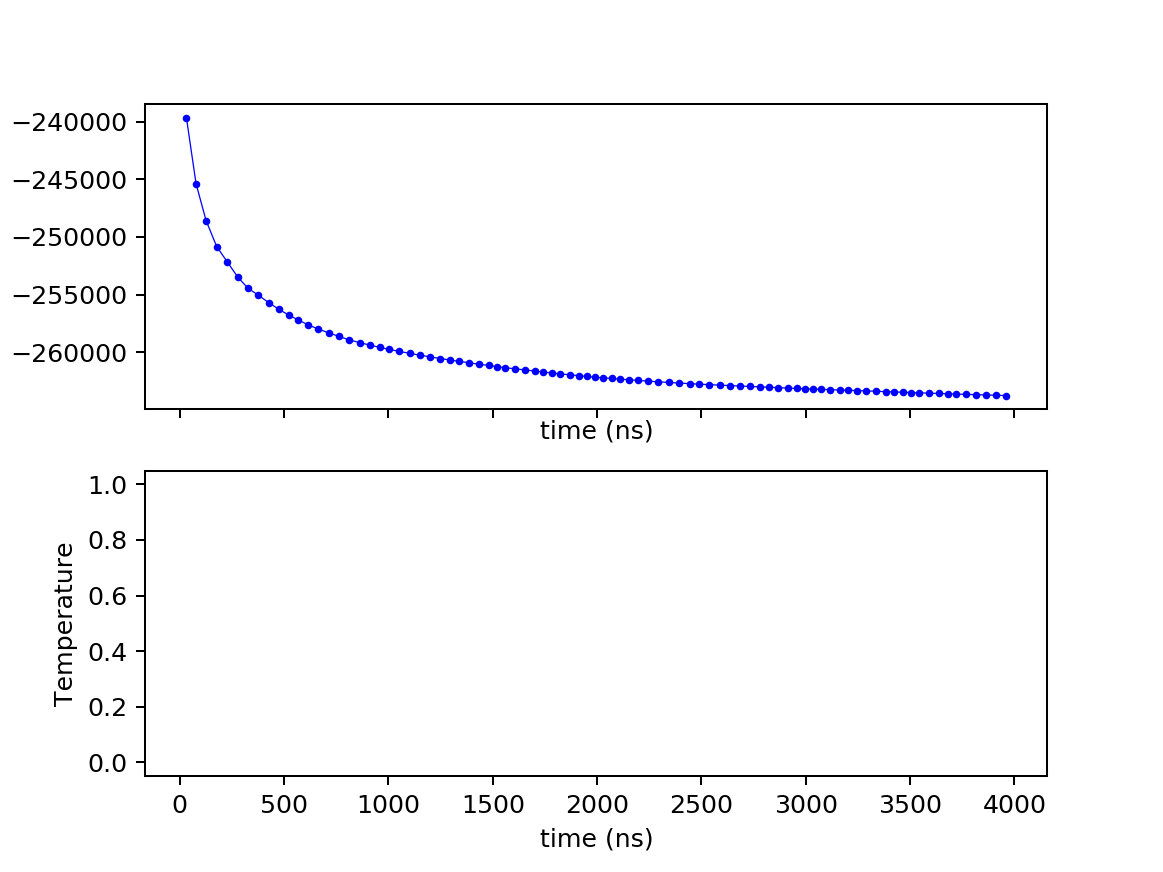

In [11]:

monitor = {'function': gromacs_py.gromacs.tools.monitor.simulation_plot,
           'extract_func': [{'func': gromacs_py.gromacs.tools.monitor.extract_log_dict,
                             'term': 'Potential'},
                           {'func': gromacs_py.gromacs.tools.monitor.extract_log_dict,
                             'term': 'Temperature'}],
           'file_check_ext':'log'}
#monitor = {'function': gromacs_py.gromacs.tools.monitor.print_log_file,
#           'terms':['Potential', 'Temperature'],
#           'file_check_ext':'log'}

md_sys.em('tmp', nsteps=4000, dt=0.005,
                   monitor=monitor, nstlog=100)

In [9]:
md_sys.display()

name         : 1Y0M
sim_name     : 1Y0M
coor_file    : tmp/1Y0M.gro
top_file     : data_sim/sys_top/1Y0M_water_ion.top
tpr          : tmp/1Y0M.tpr
mdp          : tmp/1Y0M.mdp
xtc          : tmp/1Y0M.trr
edr          : tmp/1Y0M.edr
log          : tmp/1Y0M.log
nt           : 0
ntmpi        : 0
sys_history  : 1


In [ ]:
%cd /Users/smurail/Documents/Code/gromacs_py/gromacs_py/doc/notebook/

In [ ]:
%matplotlib notebook

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()



fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)



In [ ]:
get_ipython().__class__.__name__

<IPython.core.display.Javascript object>


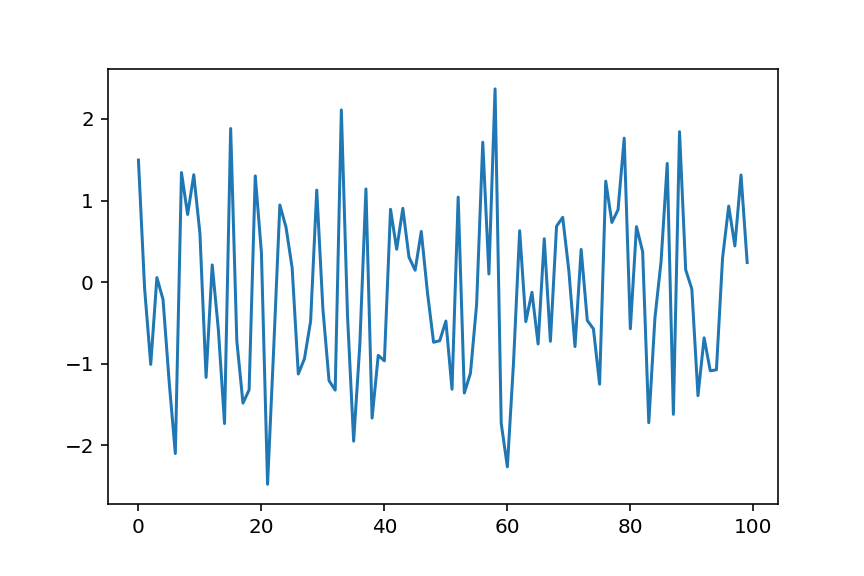

In [18]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time 

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

plt.gcf()


for i in range(0,10):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()
    plt.pause(0.5)

<IPython.core.display.Javascript object>


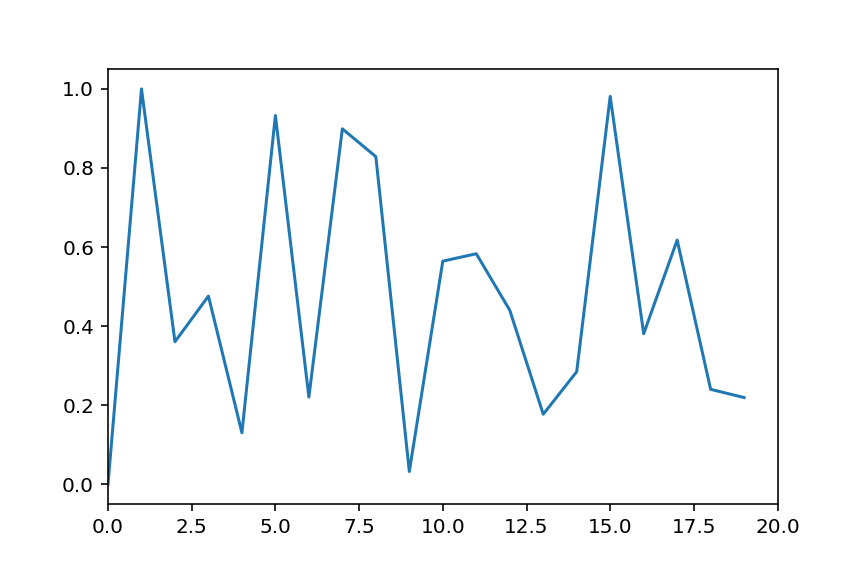

done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop
done with loop


In [25]:
%matplotlib notebook
import pylab
import time
import random
import matplotlib.pyplot as plt

dat=[0,1]
fig = plt.figure()
ax = fig.add_subplot(111)
Ln, = ax.plot(dat)
ax.set_xlim([0,20])
plt.ion()
#plt.show()    
for i in range (18):
    dat.append(random.uniform(0,1))
    Ln.set_ydata(dat)
    Ln.set_xdata(range(len(dat)))
    time.sleep(1)

    print('done with loop')